# Lecture 13 - Support Vector Machines

## The (linear) Support Vector Classifier

### Create dataset that is not perfectly separable

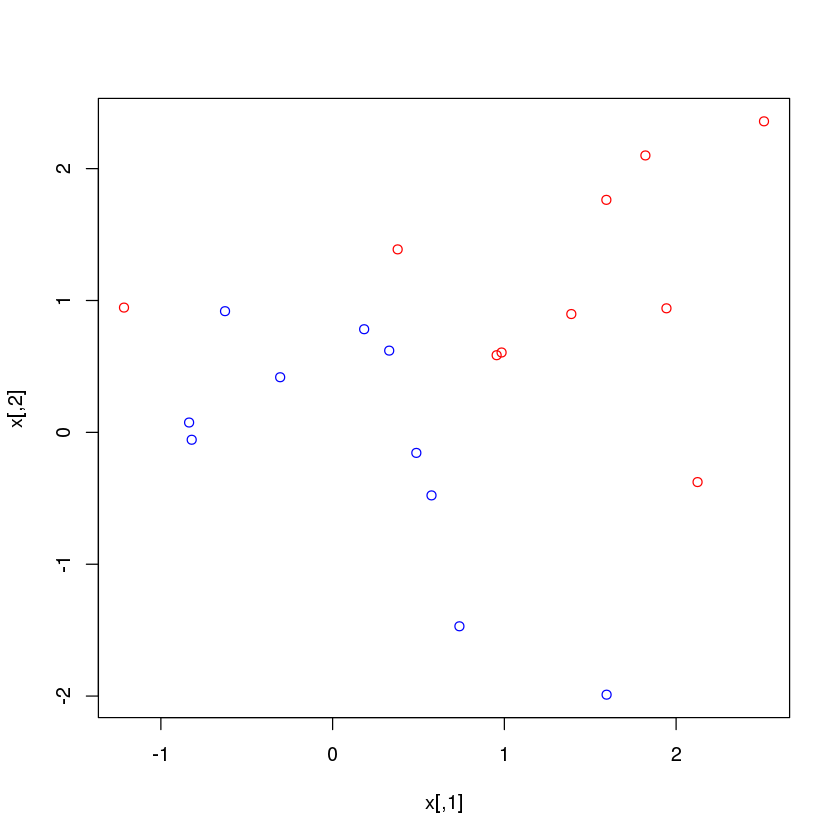

In [50]:
set.seed(1)
x=matrix(rnorm(20*2),ncol=2)
y=c(rep(-1,10),rep(1,10)) #generate class labals 
x[y==1,] = x[y==1,] + 1 #add 1 to the x predictors for the class "1". This generates a set of observations for class "1" that are different (on average) than class "0"
plot(x,col=(3-y))

In [51]:
dat=data.frame(x=x,y=as.factor(y)) #create a data frame from the generated data

We will use the svm() function to fit a Support Vector Machine. 

This function takes as argument the parameter "cost" which is the cost of violating the margin. Therefore a lower "cost" leads to more violations, a wider margin, and more support vectors.

This parameter therefore implements the bias/variance tradeoff.

In [52]:
library(e1071)
svmfit=svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE) #fits a suport vector classifier (linear)

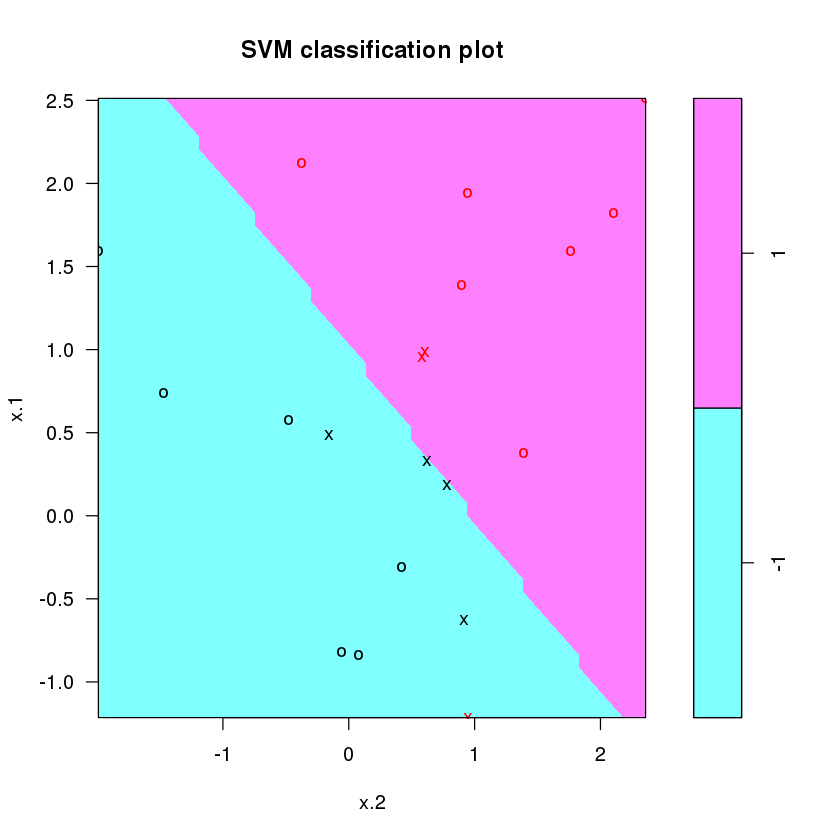

In [53]:
plot(svmfit,dat)

In [54]:
svmfit$index #the indices of thes support vectors

[1]  1  2  5  7 14 16 17

In [55]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




There were 7 support vectors (4 in one calss and 3 in the other)

We can reduce the cost (this increases the budget C for violations)

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

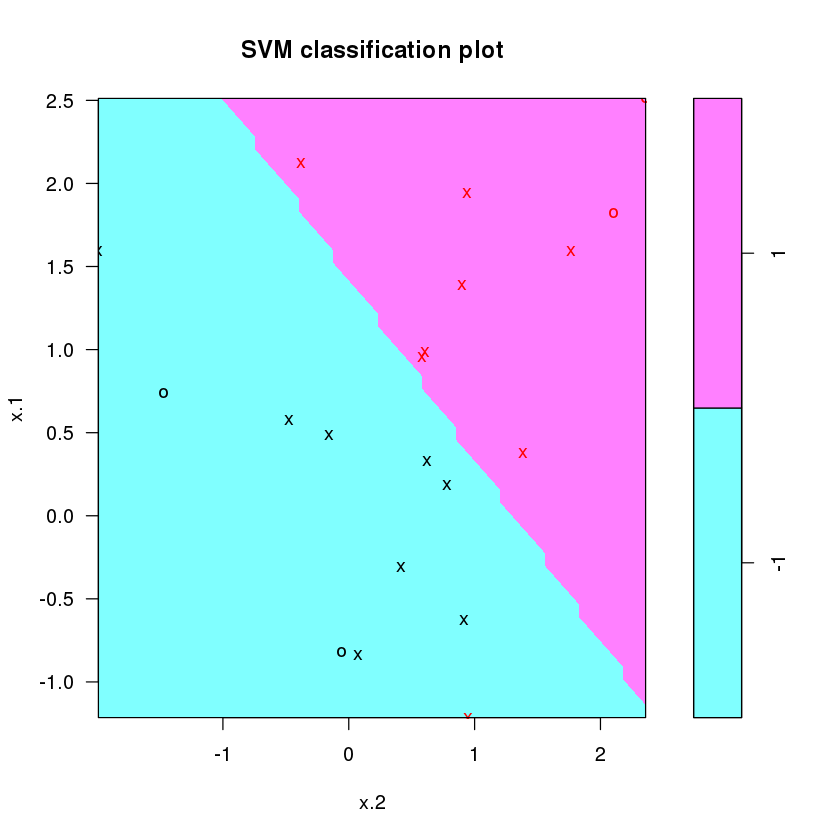

In [56]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.1, scale=FALSE) #fits a suport vecotr classifier (linear)
plot(svmfit,dat)
svmfit$index

We get a larger number of support vectors because the margin is wider

### Cross-Validation

We can use the function tune() in the e1071 library to perform cross-validation 

In [78]:
set.seed(1)
tune.out=tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001,0.1,1,5,10,100)))

In [79]:
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
  cost
 0.001

- best performance: 0.25 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.25   0.120185
2 1e-01  0.25   0.120185
3 1e+00  0.25   0.120185
4 5e+00  0.25   0.120185
5 1e+01  0.25   0.120185
6 1e+02  0.25   0.120185


cost=0.1 has the lowest cross-validation rate. We can access it with the following command

In [80]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.001 
      gamma:  0.5 

Number of Support Vectors:  101

 ( 51 50 )


Number of Classes:  2 

Levels: 
 1 2




Generate a test dataset using the same process that we used to generate the training data.

In [81]:
xtest=matrix(rnorm(20*2),ncol=2)
ytest=sample(c(-1,1),20,rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1.]+1
testdat=data.frame(x=xtest,y=as.factor(ytest))

In [82]:
ypred=predict(bestmod,testdat)
table(predict=ypred,truth=testdat$y)

       truth
predict -1  1
      1 14  6
      2  0  0

19 of 20 datapoints are correctly classified! What about with cost=0.01?

In [83]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.01, scale=FALSE) #fits a suport vecotr classifier (linear)
ypred=predict(svmfit,testdat)
table(predict=ypred,truth=testdat$y)

       truth
predict -1  1
      1 14  6
      2  0  0

A different "cost" leads to a worse test prediction error

### Perfect Separation

What about when the two classes are perfectly separable?

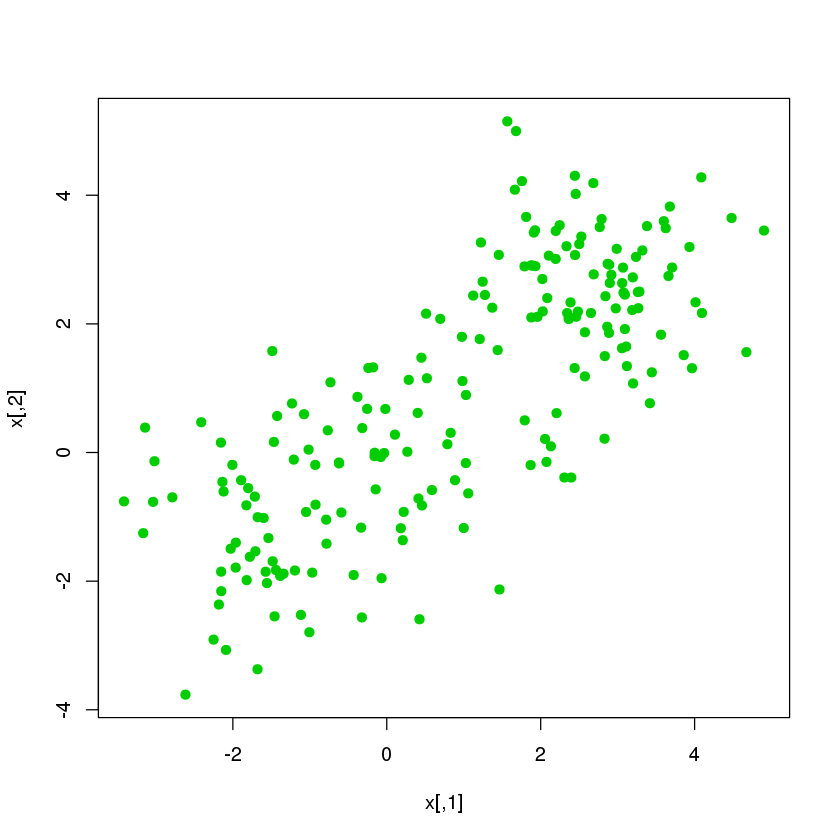

In [84]:
x[y==1,]=x[y==1.]+0.5
plot(x,col=(y+5)/2,pch=19)

The data are now perfectly separable. We can fit with an classifier with a large cost, so that no observations are misclassified (the margin is small).


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  108

 ( 58 50 )


Number of Classes:  2 

Levels: 
 1 2




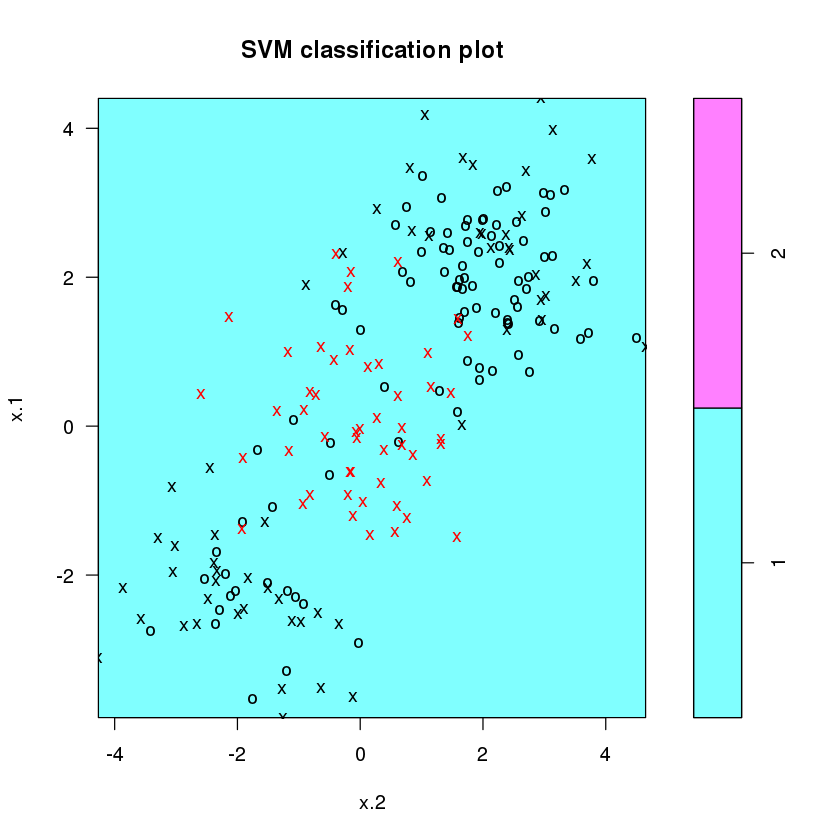

In [85]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5, scale=FALSE) #fits a suport vecotr classifier (linear)
summary(svmfit)
plot(svmfit,dat)

There are no training errors, and only 3 support vectors. However since the margin is very small, observations which are not support vectors (circles) are very close to the boundary. This might lead to overfitting.


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  103

 ( 53 50 )


Number of Classes:  2 

Levels: 
 1 2




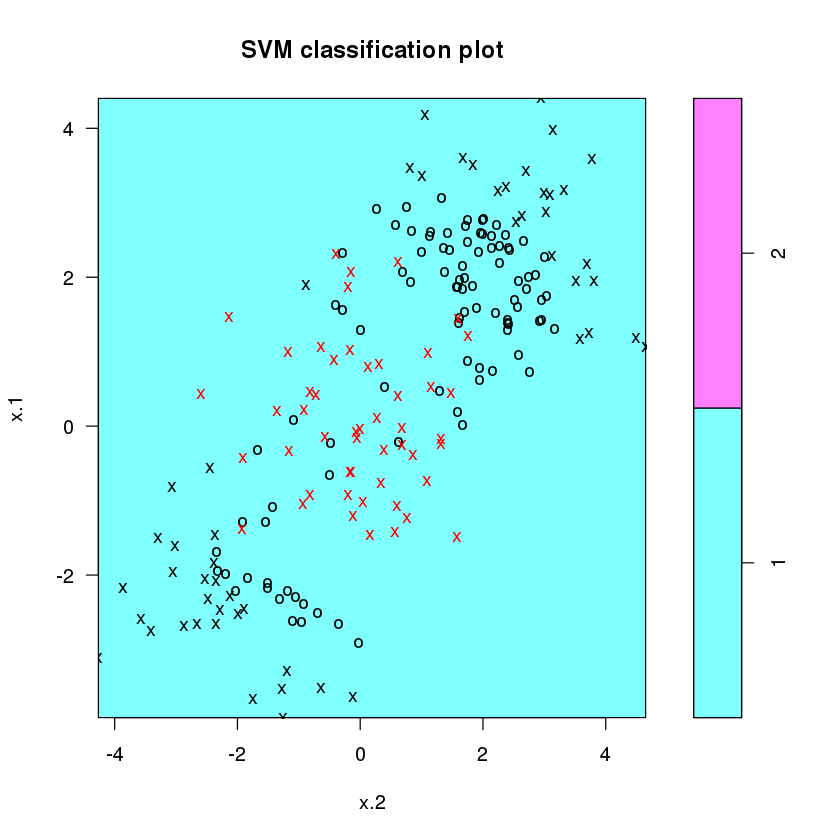

In [86]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1, scale=FALSE) #fits a suport vecotr classifier (linear)
summary(svmfit)
plot(svmfit,dat)

Some observations are misclassified, but the margin is much wider and makes use of seven support vectors. This model will likely perform better on test data.

## Support Vector Machines

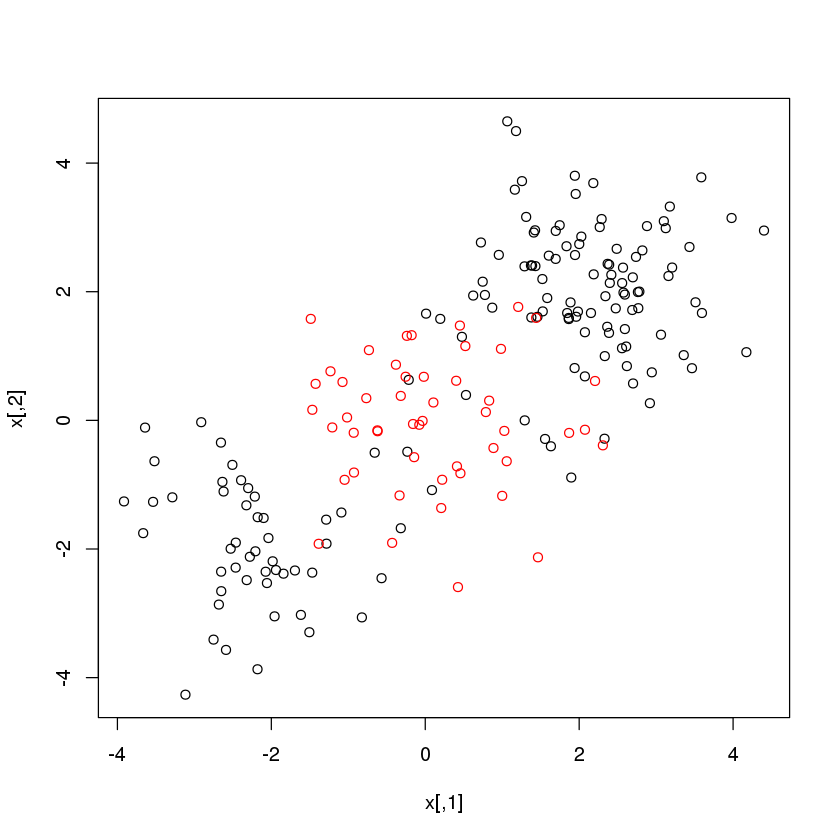

In [70]:
set.seed(1)
x=matrix(rnorm(200*2),ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))

plot(x,col=y) #plot to ensure the boundary is non-linear

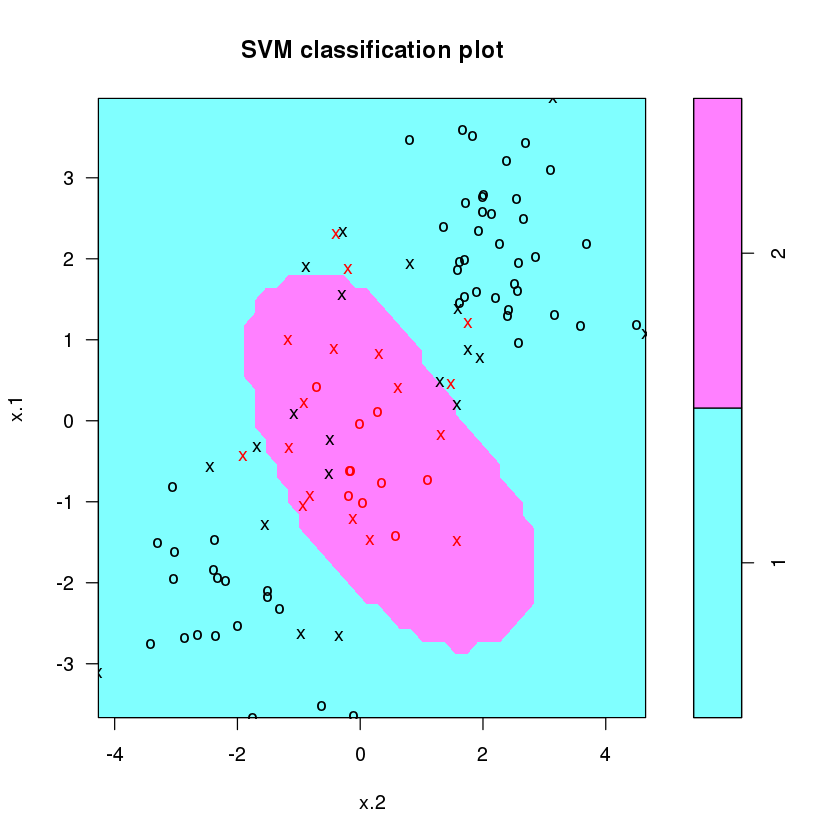

In [71]:
train=sample(200,100)
svmfit=svm(y~., data=dat[train,],kernel="radial",gamma=1,cost=1)
plot(svmfit,dat[train,])

In [72]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




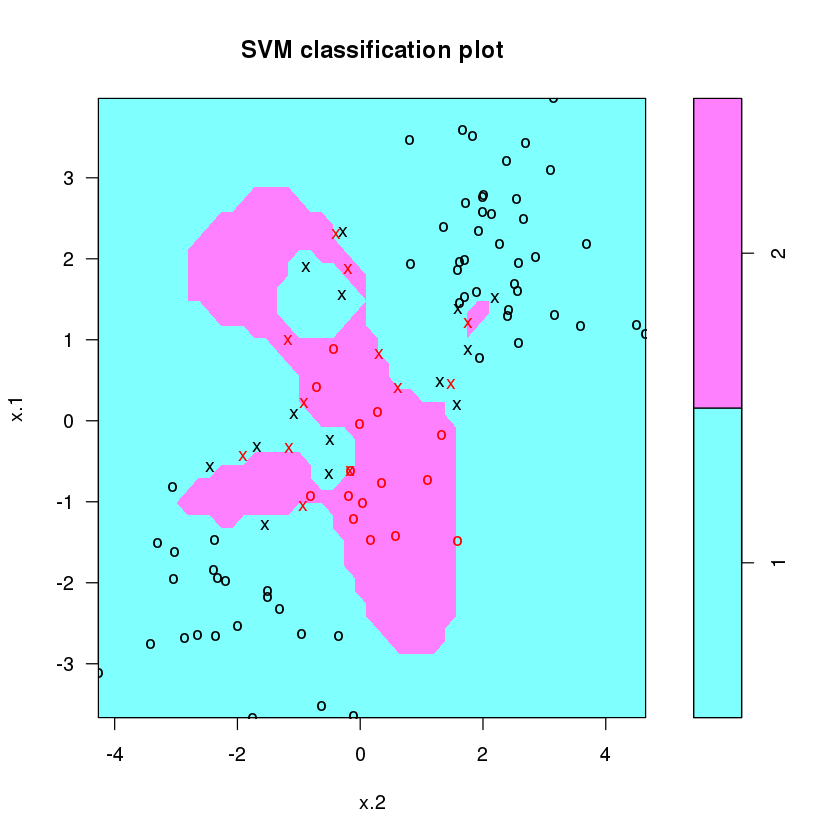

In [73]:
svmfit=svm(y~.,data=dat[train,],kernel="radial",gamma=1,cost=1e5)
plot(svmfit,dat[train,])

### Cross-Validation

In [75]:
set.seed(1)
tune.out=tune(svm,y~.,data=dat[train,],kernel="radial",ranges=list(cost=c(0.1,1,10,100,1000)),gamma=c(0.5,1,2,3,4))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.13 

- Detailed performance results:
   cost error dispersion
1 1e-01  0.27 0.11595018
2 1e+00  0.13 0.08232726
3 1e+01  0.15 0.07071068
4 1e+02  0.17 0.08232726
5 1e+03  0.21 0.09944289


The best parameters are cost=1 and gamma=2

In [76]:
table(true=dat[-train,"y"],pred=predict(tune.out$best.model,newdata=dat[-train,]))

    pred
true  1  2
   1 72  5
   2  7 16

10% of test observations are misclasified

### ROC Curves

In [77]:
library(ROCR)

# we need a function that will plot an ROC curve given a vector numerical scors for each observation (pred) and a vector containing the class label for each observation (truth)
rocplot=function(pred,truth,...){
    predob=prediction(pred,truth)
    perf=performance(predob,"tpr","fpr")
    plot(perf,...)
}

ERROR: Error in library(ROCR): there is no package called ‘ROCR’


Usually, svm output the predicted class labels. However we can obtain fitted values for each observation $f(x)$.

We can get these with the "decision.values" flag

In [ ]:
svmfit.opt=svm(y~., data=dat[train,],kernel="radial",gamma=2,cost=1,decision.values=T)
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values

In [ ]:
par(mfrow=c(1,2))
rocplot(fitted,dat[train"y"],add=T,col="red")

In [ ]:
svmfit.flex=svm(y~., data=dat[train,],kernel="radial",gamma=2,cost=1,decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=TRUE))$decision.values
rocplot(fitted,dat[train"y"],add=T,col="red")

On Test Data

In [ ]:
fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=TRUE))$decision.values
rocplot(fitted,dat[-train"y"],main="Test Data")

fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=TRUE))$decision.values
rocplot(fitted,dat[-train"y"],add=T,col="red")